# COVID-19 Excercise

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. 
Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

### Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Analysis based on:
1. Number of confirmed, deaths, recovered cases of Novel Coronavirus (COVID-19) Country wise
2. Number of confirmed,deaths and recovered cases of COVID-19 Province wise for USA and China
3. Top 10 Countries most affected by Covid-19 based on confirmed cases as of 17th March 2020
4. Country wise deaths cases of Covid-19 as of 17th March 2020
5. Countries with no COVID-19 recovery as of 17th March 2020
6. Total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150
7. India's stand on COVID-19 as of 17th March 2020
8. Visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  126 non-null    object 
 1   Country/Region  276 non-null    object 
 2   Last Update     276 non-null    object 
 3   Confirmed       276 non-null    int64  
 4   Deaths          276 non-null    int64  
 5   Recovered       276 non-null    int64  
 6   Latitude        276 non-null    float64
 7   Longitude       276 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.4+ KB


In [4]:
# Number of confirmed, deaths, recovered cases of Novel Coronavirus (COVID-19) Country wise
data_1 = data.groupby(['Country/Region'])[['Confirmed','Deaths','Recovered']].max()
data_1.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,22,0,1
Albania,55,1,0
Algeria,60,4,12
Andorra,39,0,1
Antigua and Barbuda,1,0,0


Text(0, 0.5, 'Number of cases')

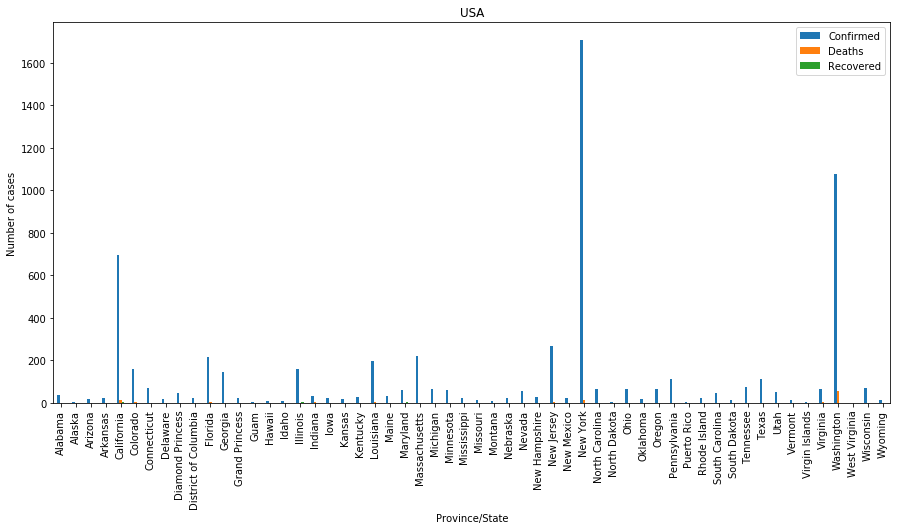

In [5]:
# Number of confirmed,deaths and recovered cases of COVID-19 Province wise for USA and China
data_2 = data.groupby(['Country/Region','Province/State'])[['Confirmed','Deaths','Recovered']].max()
data_2.loc['US'].plot(kind = 'bar',figsize = (15,7))
plt.tight_layout
plt.title('USA')
plt.ylabel('Number of cases')

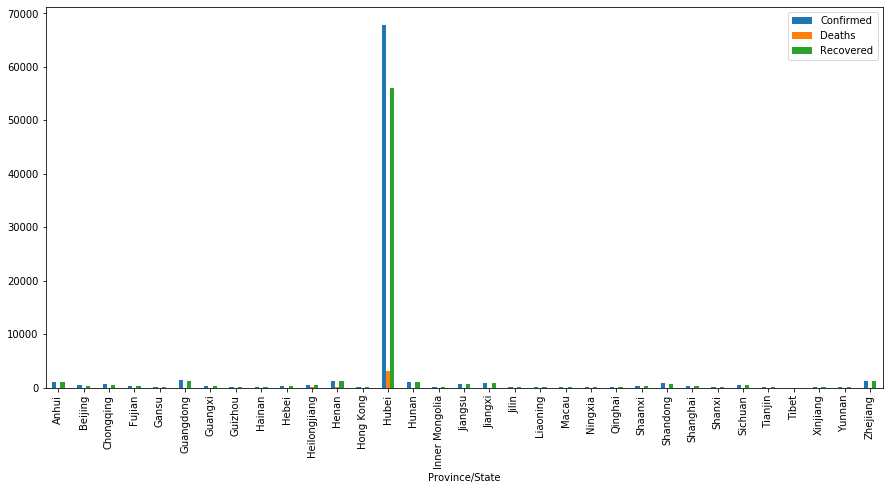

In [6]:
data_2.loc['China'].plot(kind = 'bar',figsize = (15,7))

In [7]:
# Top 10 Countries most affected by Covid-19 based on confirmed cases as of 17th March 2020
data_3 = data.sort_values('Confirmed',ascending= False)[['Country/Region','Confirmed']].head(10)
data_3

,Country/Region,Confirmed
0,China,67799
1,Italy,31506
2,Iran,16169
3,Spain,11748
4,Germany,9257
5,"Korea, South",8320
6,France,7652
7,Switzerland,2700
8,United Kingdom,1950
9,US,1706


Text(0, 0.5, 'Number of cases')

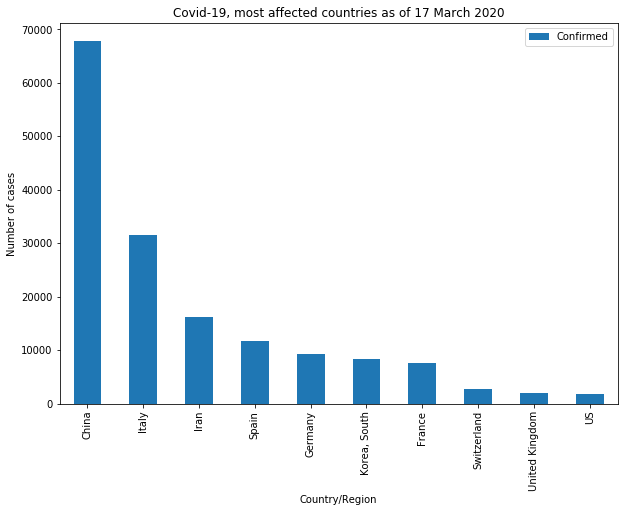

In [8]:
data_3.set_index('Country/Region').plot(kind = 'bar',figsize = (10,7))
plt.title('Covid-19, most affected countries as of 17 March 2020')
plt.ylabel('Number of cases')

In [9]:
# Country wise deaths cases of Covid-19 as of 17th March 2020
data_4 = data[['Country/Region','Deaths']].set_index('Country/Region')
data_4

,Deaths
Country/Region,
China,3111
Italy,2503
Iran,988
Spain,533
Germany,24
...,...
Guernsey,0
Jersey,0
Puerto Rico,0


Text(0.5, 0, 'Number of cases')

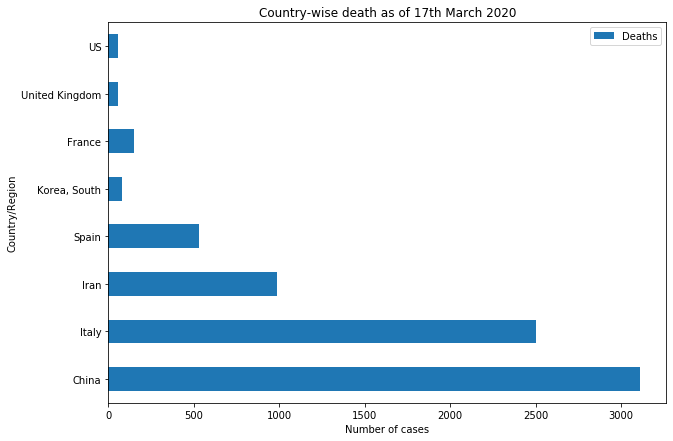

In [10]:
data_4[data_4['Deaths'] > 50].plot(kind = 'barh',figsize = (10,7))
plt.title('Country-wise death as of 17th March 2020')
plt.xlabel('Number of cases')

In [11]:
# Countries with no COVID-19 recovery as of 17th March 2020
data_1[data_1['Recovered'] == 0]

,Confirmed,Deaths,Recovered
Country/Region,,,
Albania,55,1,0
Antigua and Barbuda,1,0,0
Aruba,3,0,0
Barbados,2,0,0
Benin,1,0,0
...,...,...,...
Ukraine,14,2,0
Uruguay,29,0,0
Uzbekistan,10,0,0


In [12]:
# create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise
# where deaths greater than 150
data['Active'] = data['Confirmed'] - data['Recovered']- data['Deaths']
data_4 = data.groupby('Country/Region')[['Confirmed','Recovered','Deaths','Active']].sum().reset_index()

Text(0.5, 1.0, 'Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')

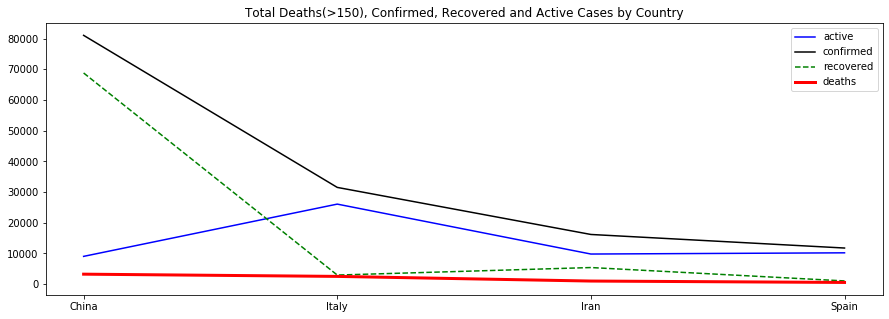

In [13]:
data_4 = data_4.sort_values('Deaths',ascending = False)
data_4 = data_4[data_4['Deaths'] > 150]
# plots
plt.figure(figsize = (15,5))
plt.plot(data_4['Country/Region'],data_4['Active'],color = 'blue',label = 'active')
plt.plot(data_4['Country/Region'],data_4['Confirmed'],color = 'black',label = 'confirmed')
plt.plot(data_4['Country/Region'],data_4['Recovered'],color = 'green',ls = '--',label = 'recovered')
plt.plot(data_4['Country/Region'],data_4['Deaths'],color = 'red', lw = 3,label = 'deaths')
plt.legend()
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')

Text(0, 0.5, 'Number of cases')

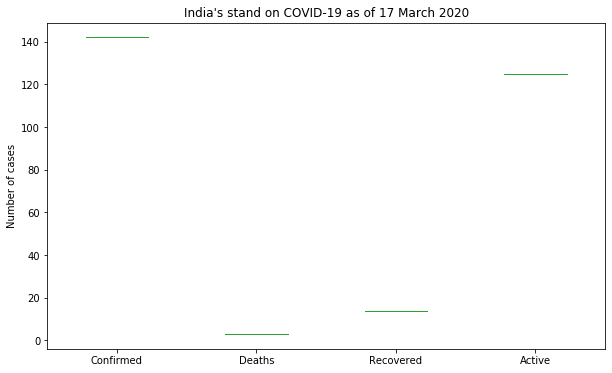

In [14]:
# As of 17th March 2020, India's stand on COVID-19
data_5 = data[data['Country/Region']=='India'].drop(['Last Update','Latitude','Longitude','Province/State'],axis = 1)
data_5.plot(kind = 'box', figsize = (10,6))
plt.title("India's stand on COVID-19 as of 17 March 2020")
plt.ylabel('Number of cases')

Text(0.5, 1.0, 'Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time')

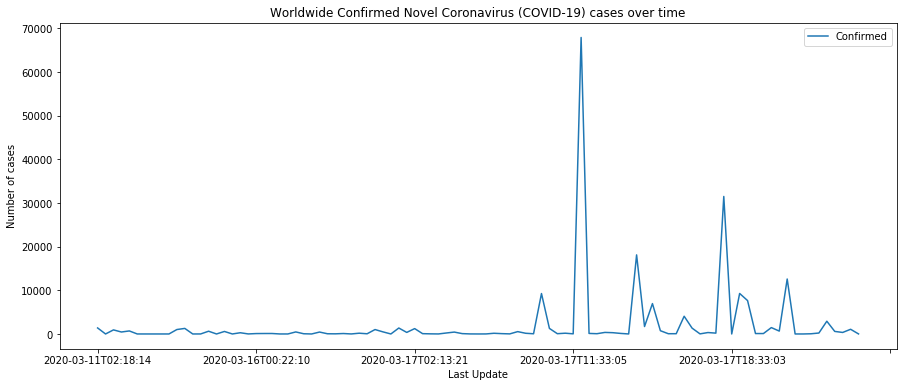

In [15]:
# Visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time
v_data = data.groupby('Last Update')[['Last Update', 'Confirmed']].sum().reset_index()
v_data.plot(x='Last Update', y='Confirmed',figsize = (15,6))
plt.ylabel('Number of cases')
plt.title('Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time')